In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
t = np.array([816.8, 350.1, 350.1, 766.8, 616.8, 800.16, 783.5, 200.0, 516.8, 316.7, 700.2, 183.4, 633.5, 266.7])

z = np.array([30, 33, 13, 17, 22, 24, 15, 27, 16, 15, 22, 30, 17, 20])

print(len(t), len(z))  # Confirming both arrays have the same length



14 14


Error Propogation used for velocity and delta.

$$\sigma_v = \frac{1}{N} \sqrt{\sum \left( v^2 \left( \left( \frac{\sigma_z}{z} \right)^2 + \left( \frac{\sigma_t}{t} \right)^2 \right) \right)}$$

and 

$$\sigma_{\delta} = \frac{1}{2} \delta \frac{\sigma_v}{v}$$



In [26]:
import numpy as np
import math

# uncertainties
sigma_t = 1000 / 60  # 16.67 ms
sigma_z = 2.5  # mm


velocities = z / t  
mean_velocity = np.mean(velocities)

# error propagation for velocity
sigma_velocity = np.sqrt(np.sum((velocities**2) * ((sigma_z / z)**2 + (sigma_t / t)**2))) / len(t)

mean_velocity_cm_s = mean_velocity * 100
sigma_velocity_cm_s = sigma_velocity * 100

# Print velocity
print(f"Velocity: ({mean_velocity_cm_s:.2f} ± {sigma_velocity_cm_s:.2f}) cm/s")

# constants for delta calculation
mu = 1.8e-3  # Pa·s 
rho = 1000   # kg/m³ 
g = 9.81     # m/s²

# Function to calculate delta
def calculate_delta(u):
    return math.sqrt((3 * mu * u) / (rho * g))

delta_result = calculate_delta(mean_velocity)

# error propagation for delta
sigma_delta = (0.5 * delta_result * (sigma_velocity / mean_velocity))

delta_microns = delta_result * 1e6
sigma_delta_microns = sigma_delta * 1e6

print(f"Delta: ({delta_result:.6e} ± {sigma_delta:.6e}) m")

print(f"Delta: ({delta_microns:.2f} ± {sigma_delta_microns:.2f}) µm")


Velocity: (5.61 ± 0.24) cm/s
Delta: (1.757115e-04 ± 3.720239e-06) m
Delta: (175.71 ± 3.72) µm


In [27]:
# Compute median velocity
median_velocity = np.median(velocities)

delta_median_microns = delta_median * 1e6
sigma_delta_median_microns = sigma_delta_median * 1e6


print(f"Delta (Median): {delta_median_microns:.2f} µm")


Delta (Median): 141.16 µm


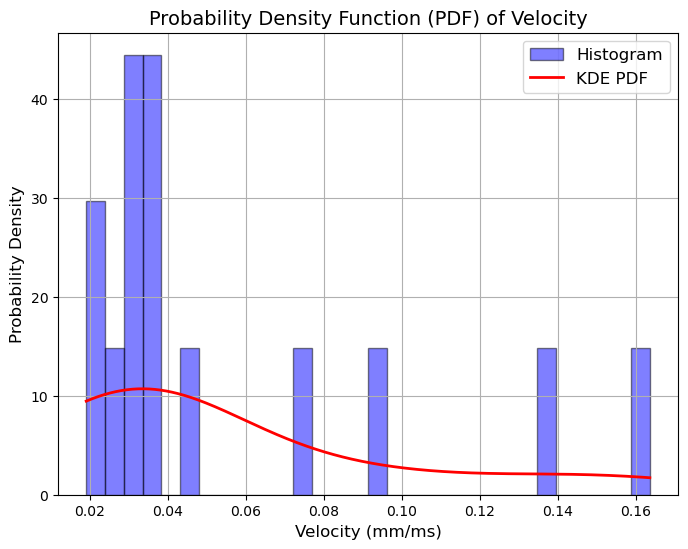

In [28]:


# Compute velocities
velocities = z / t  # Element-wise division

# Fit a kernel density estimate (KDE) to the velocities
kde = stats.gaussian_kde(velocities, bw_method='scott')

# Generate values for the x-axis
vel_values = np.linspace(min(velocities), max(velocities), 500)

# Compute the probability density function
pdf_values = kde(vel_values)


plt.figure(figsize=(8, 6))
plt.hist(velocities, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')  # Increased bins
plt.plot(vel_values, pdf_values, color='red', linewidth=2, label='KDE PDF')


plt.xlabel('Velocity (mm/ms)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Density Function (PDF) of Velocity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)


plt.show()
